# AIDS Virus Infection Prediction

In [3]:
# firstly I am importing neccesery libraries for my program to run efficiently

import pandas as pd   # used for csv file handling
import numpy as np    # used for Linear Algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
# to find file and directory location
for dirname, _, filenames in os.walk('AIDS_Classification.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))   # to join the path of file

In [5]:
# reading the csv file by
df = pd.read_csv("AIDS_Classification.csv")

In [6]:
# provides output of file
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


<Axes: >

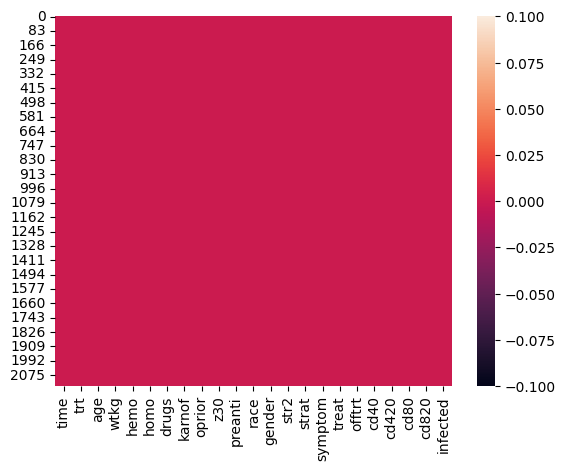

In [20]:
#checking where graph values are null
sns.heatmap(df.isnull())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

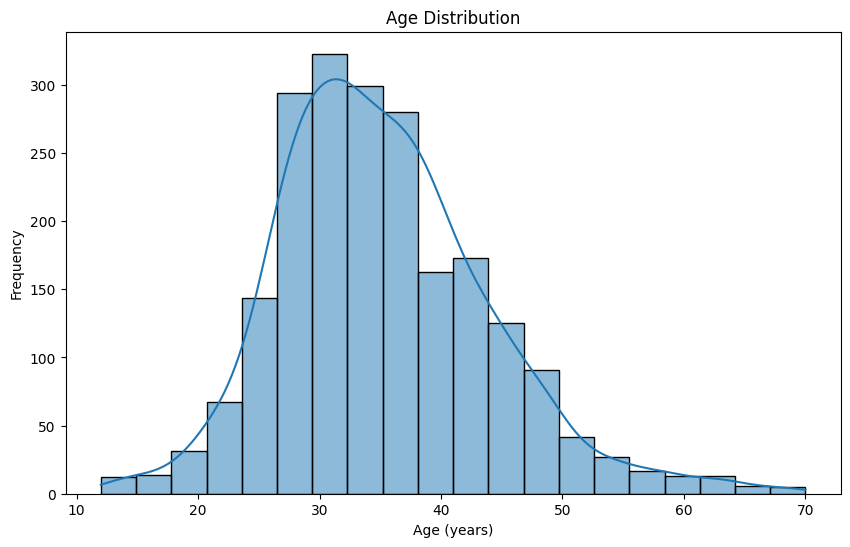

In [7]:
# now we are plotting a graph for age distribution
plt.figure(figsize=(10,6))
# using the histogram style
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel('Frequency')
plt.show()

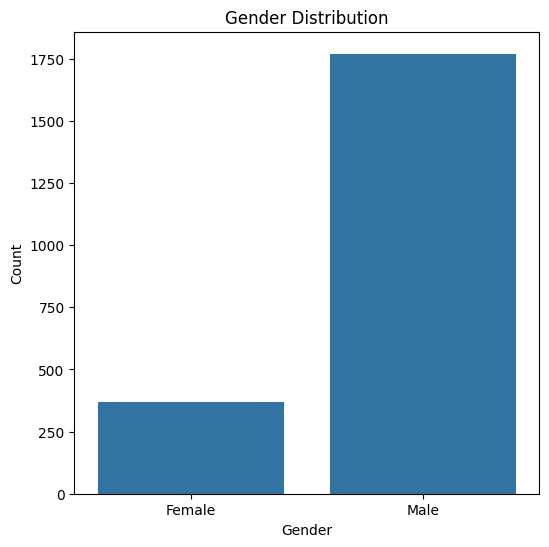

In [9]:
#plotting graph for Gender Distriibution
plt.figure(figsize=(6,6))
#using count plot style
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.show()

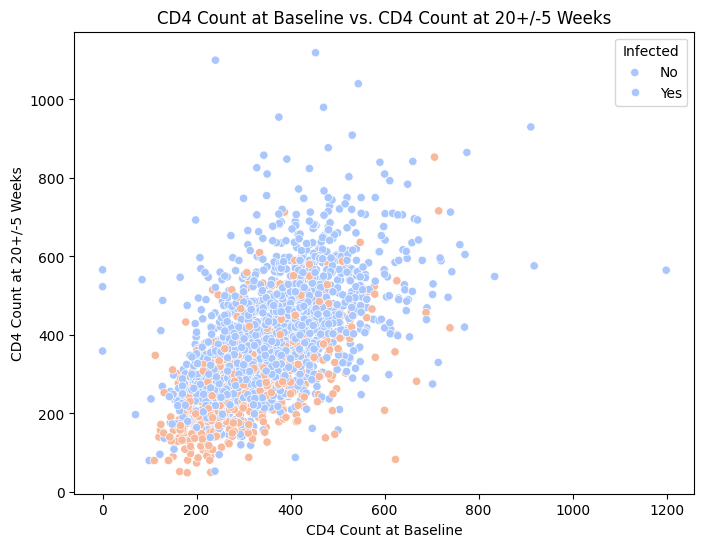

In [11]:
# plotting graph for infected and non infected
plt.figure(figsize=(8, 6))
#using scatter plot style
sns.scatterplot(x='cd40', y='cd420', data=df, hue='infected', palette='coolwarm')
plt.title('CD4 Count at Baseline vs. CD4 Count at 20+/-5 Weeks')
plt.xlabel('CD4 Count at Baseline')
plt.ylabel('CD4 Count at 20+/-5 Weeks')
plt.legend(title='Infected', labels=['No', 'Yes'])
plt.show()

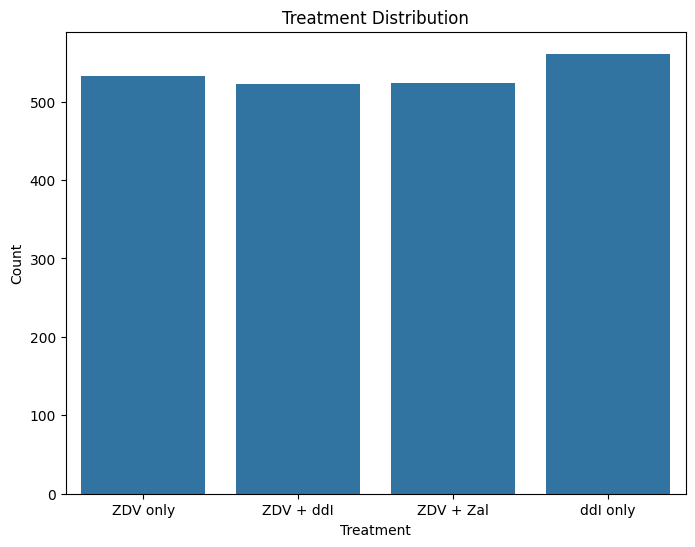

In [12]:
# graph for Treatment distribution
plt.figure(figsize=(8, 6))
# using countplot style for this gtraph
sns.countplot(x='trt', data=df)
plt.title('Treatment Distribution')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['ZDV only', 'ZDV + ddI', 'ZDV + Zal', 'ddI only'])
plt.show()

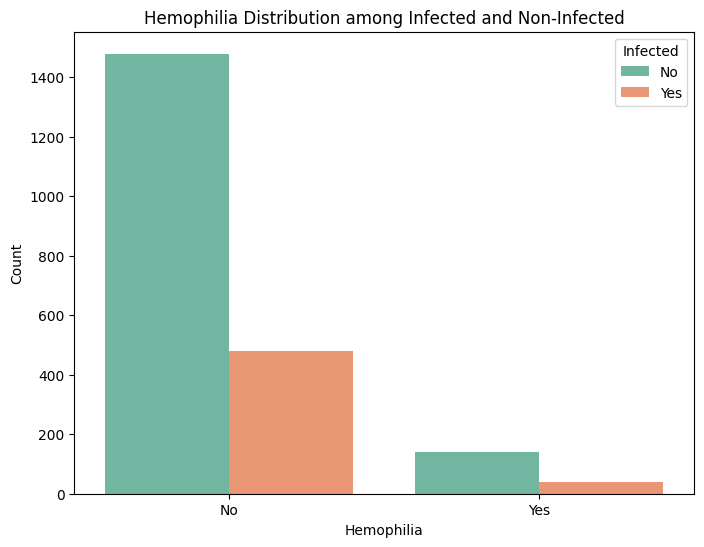

In [13]:
# Graph for Hemophilia amoung people
plt.figure(figsize=(8, 6))
# Using count plot
sns.countplot(x='hemo', hue='infected', data=df, palette='Set2')
plt.title('Hemophilia Distribution among Infected and Non-Infected')
plt.xlabel('Hemophilia')
plt.ylabel('Count')
plt.legend(title='Infected', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

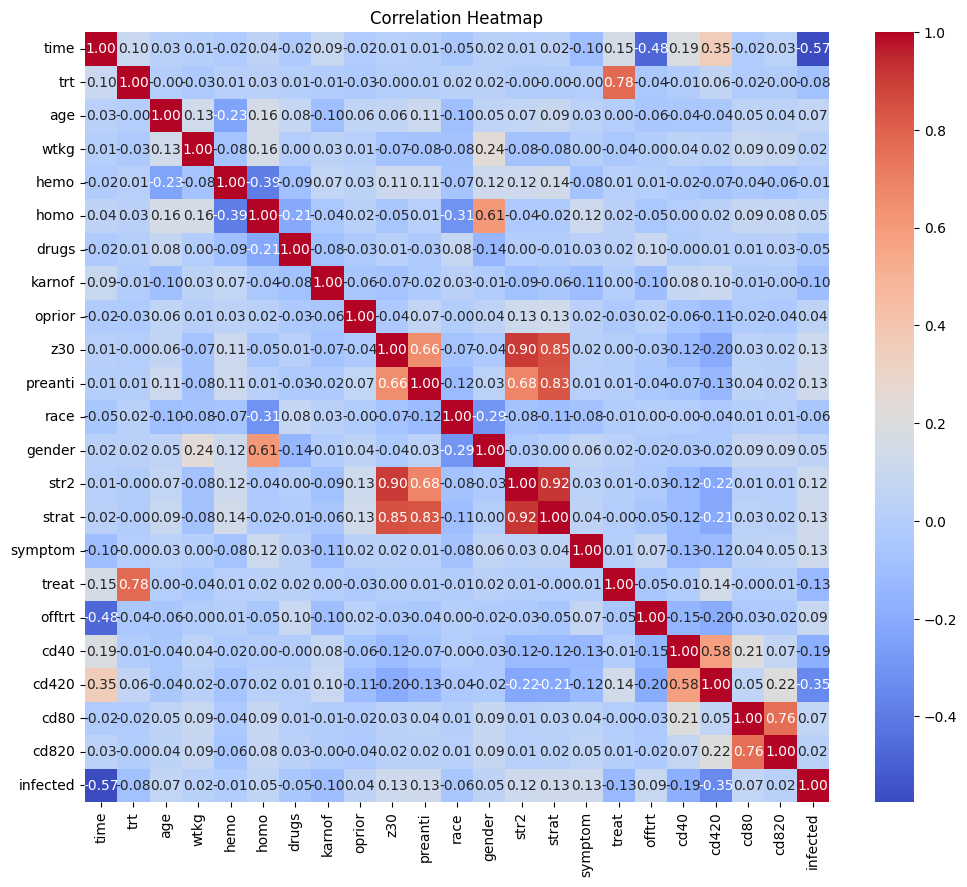

In [14]:
# we highlight some corelation values now
plt.figure(figsize=(12, 10))
# using the heatmap graph style
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

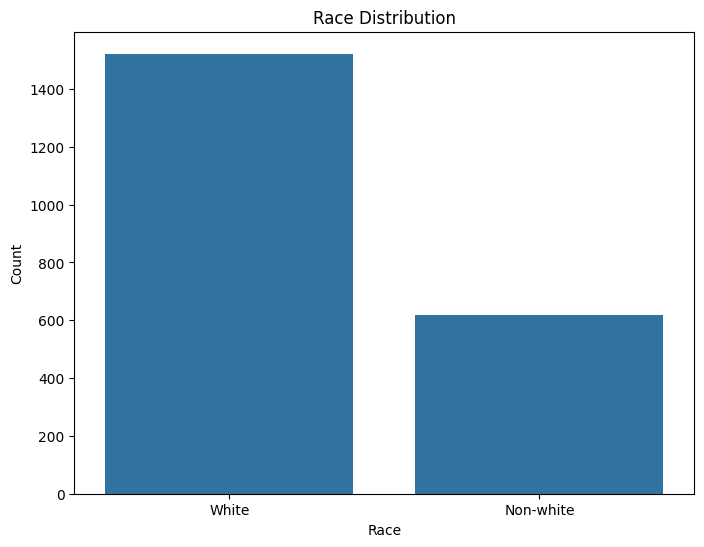

In [15]:
# Now not being racist, we are plotting a graph for race distribution
plt.figure(figsize=(8, 6))
#using count plot graph style
sns.countplot(x='race', data=df)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['White', 'Non-white'])
plt.show()

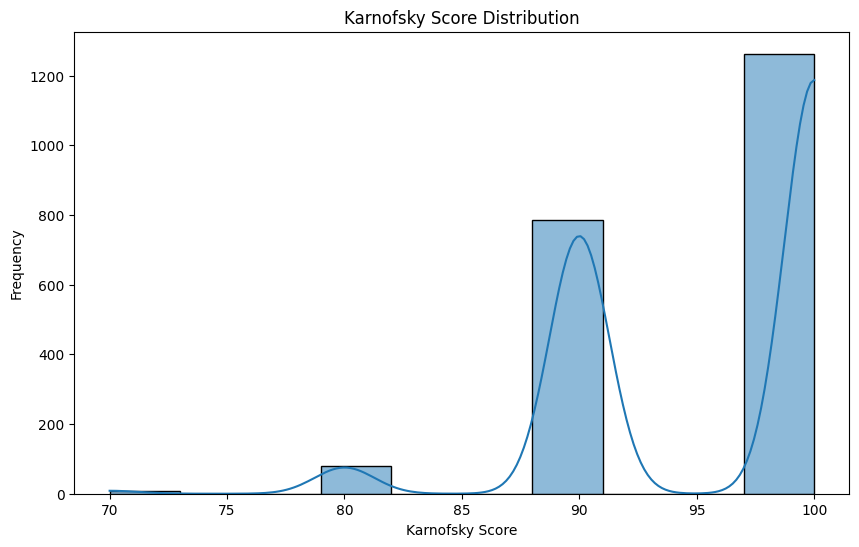

In [16]:
# Karnofsky: A standard way of measuring the ability of patients to perform ordinary tasks
# we are plotting a graph for this now using histogram representation
plt.figure(figsize=(10, 6))
sns.histplot(df['karnof'], bins=10, kde=True)
plt.title('Karnofsky Score Distribution')
plt.xlabel('Karnofsky Score')
plt.ylabel('Frequency')
plt.show()

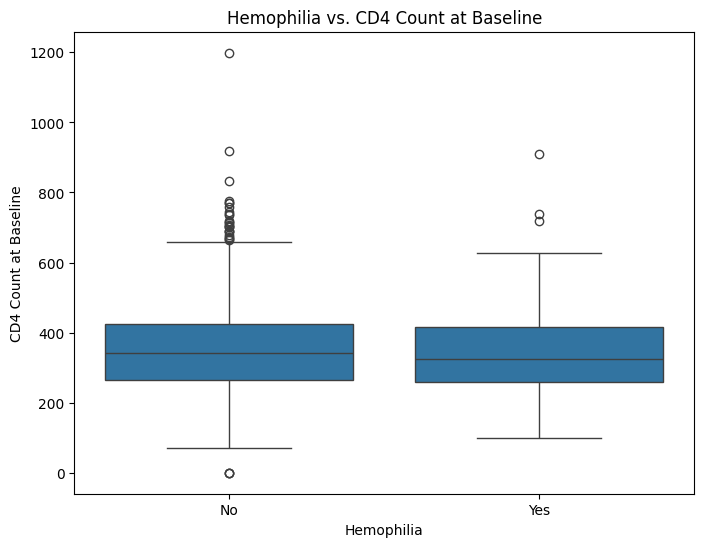

In [17]:
# graph to find the comparison of Hemophilia and CD4
plt.figure(figsize=(8, 6))
# using boxplotting style
sns.boxplot(x='hemo', y='cd40', data=df)
plt.title('Hemophilia vs. CD4 Count at Baseline')
plt.xlabel('Hemophilia')
plt.ylabel('CD4 Count at Baseline')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) #get and set the current tick locations and labels of the x-axis
plt.show()

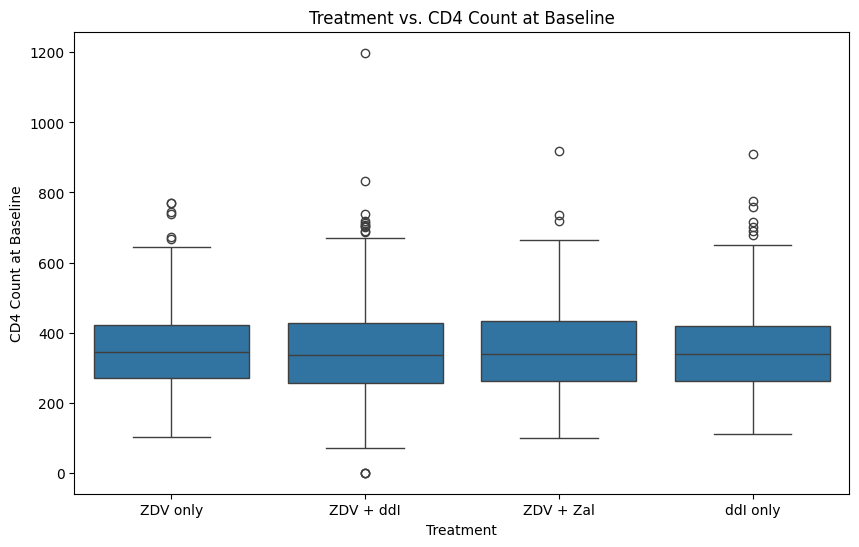

In [18]:
# now finding comparison of treatment
plt.figure(figsize=(10, 6))
# using boxplot
sns.boxplot(x='trt', y='cd40', data=df)
plt.title('Treatment vs. CD4 Count at Baseline')
plt.xlabel('Treatment')
plt.ylabel('CD4 Count at Baseline')
plt.xticks(ticks=[0, 1, 2, 3], labels=['ZDV only', 'ZDV + ddI', 'ZDV + Zal', 'ddI only'])
plt.show()

# Prediction using Random Forest



In [29]:
# importing libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
df.isna().sum()  # sum of null values

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [35]:
#Dropping a Column and Creating Feature and Target Variables
x = df.drop('infected', axis=1)
y = df['infected']
#Splitting the Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
#Checking the Shapes of Training and Testing Sets
x_train.shape, y_train.shape
x_test.shape, y_test.shape
#Creating and Configuring the Random Forest Classifier
rfc = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=8,
    random_state=5,
)
#Training the Model
model = rfc.fit(x_train, y_train)
#Evaluating the Model
model.score(x_test,y_test)

#Making Predictions
y_pred = model.predict(x_test)
#Calculating the Accuracy Score
score = accuracy_score(y_pred, y_test)
print(f'Accuracy score: {score}')

Accuracy score: 0.8822429906542056


In [34]:
df.nunique()

time         713
trt            4
age           59
wtkg         667
hemo           2
homo           2
drugs          2
karnof         4
oprior         2
z30            2
preanti      813
race           2
gender         2
str2           2
strat          3
symptom        2
treat          2
offtrt         2
cd40         484
cd420        570
cd80        1090
cd820       1050
infected       2
dtype: int64